In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r"D:\Hungary\Semester 2\Open-Source Technologies for Data Science\Practice\Project\ICU\Modified_ICU_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frame.time_delta  15000 non-null  float64
 1   tcp.time_delta    15000 non-null  float64
 2   tcp.flags.ack     15000 non-null  int64  
 3   tcp.flags.push    15000 non-null  int64  
 4   tcp.flags.reset   15000 non-null  int64  
 5   mqtt.hdrflags     15000 non-null  object 
 6   mqtt.msgtype      15000 non-null  int64  
 7   mqtt.qos          15000 non-null  int64  
 8   mqtt.retain       15000 non-null  int64  
 9   mqtt.ver          15000 non-null  int64  
 10  class             15000 non-null  object 
 11  label             15000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB
None


,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,class,label
0,0.000000,0.000000,0,0,0,0,0,0,0,0,Attack,1
1,0.000052,0.000052,1,0,0,0,0,0,0,0,Attack,1
2,0.000008,0.000000,0,0,0,0,0,0,0,0,Attack,1
3,0.000012,0.000012,1,0,0,0,0,0,0,0,Attack,1
4,0.000003,0.000000,0,0,0,0,0,0,0,0,Attack,1


In [3]:
# Select numerical features for anomaly detection (excluding 'label' if it exists)
features = df.select_dtypes(include=[np.number]).drop(columns=['label'], errors='ignore')

# Display the selected features
print(features.head())


   frame.time_delta  tcp.time_delta  tcp.flags.ack  tcp.flags.push  \
0          0.000000        0.000000              0               0   
1          0.000052        0.000052              1               0   
2          0.000008        0.000000              0               0   
3          0.000012        0.000012              1               0   
4          0.000003        0.000000              0               0   

   tcp.flags.reset  mqtt.msgtype  mqtt.qos  mqtt.retain  mqtt.ver  
0                0             0         0            0         0  
1                0             0         0            0         0  
2                0             0         0            0         0  
3                0             0         0            0         0  
4                0             0         0            0         0  


In [4]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to the features
iso_forest.fit(features)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [5]:
# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
df['anomaly'] = iso_forest.predict(features)

# Map predictions to 0 (normal) and 1 (anomaly) for consistency
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Count anomalies and normal points
print(df['anomaly'].value_counts())


anomaly
0    14250
1      750
Name: count, dtype: int64


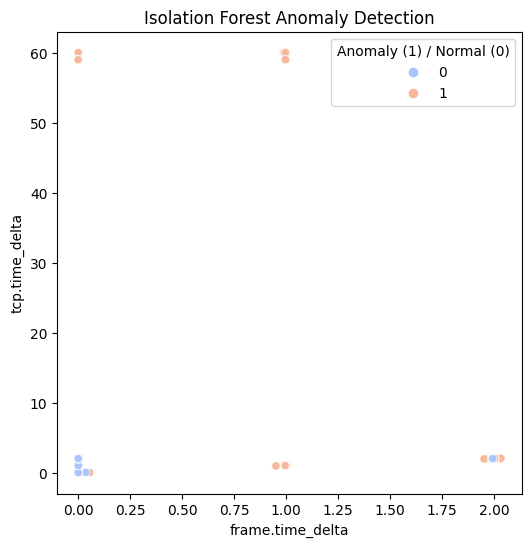

In [8]:
# Plot anomalies using 'frame.time_delta' and 'tcp.time_delta'
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='frame.time_delta', y='tcp.time_delta', hue='anomaly', palette='coolwarm')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('frame.time_delta')
plt.ylabel('tcp.time_delta')
plt.legend(title='Anomaly (1) / Normal (0)')
plt.show()


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Check if 'label' column exists and evaluate the performance
if 'label' in df.columns:
    print(confusion_matrix(df['label'], df['anomaly']))
    print(classification_report(df['label'], df['anomaly']))


[[7051  299]
 [7199  451]]
              precision    recall  f1-score   support

           0       0.49      0.96      0.65      7350
           1       0.60      0.06      0.11      7650

    accuracy                           0.50     15000
   macro avg       0.55      0.51      0.38     15000
weighted avg       0.55      0.50      0.37     15000

